# Linear Models

## Univariate Linear Regression

Y = b0 + b1 * X + alpha

Where, b0 and b1 are the coefficients of regression.

### Dataset

In [1]:
X=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Y=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

X,Y

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])

### Check linearity

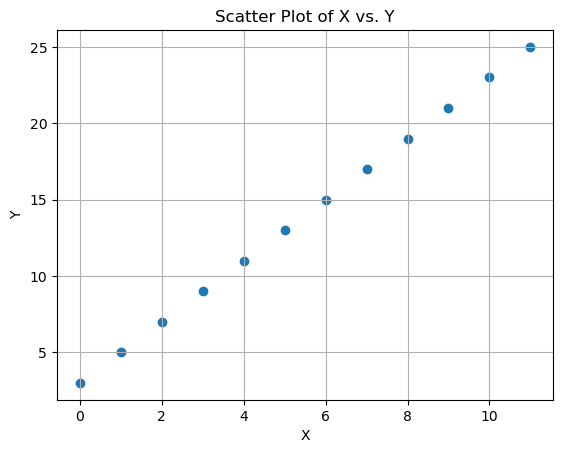

In [2]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs. Y')
plt.grid(True)
plt.show()

In [3]:
def predict(x,b0,b1):
    return b1*x + b0

but b0, b1 are not calculated yet

The goal is to find the values of b0​ and b1​

### Gradient Descent For Parameter Estimation

J(b1,b0)= 1/n​(y - y_pred)^2

J(b1,b0)= 1/n​(y - b0 + b1 * x)^2

In [4]:
def cost_function(b0, b1, X,Y):
    """Calculates Mean Squared Error (MSE) cost function."""
    predictions = [predict(xi, b0, b1 ) for xi in X]
    errors = [(yi - pred) ** 2 for yi, pred in zip(Y, predictions)]
    mse = sum(errors) / len(X)
    return mse

derivate w.r.t b1: 
J'b1 = - 1/n * 2 * (y - y_pred) * x

derivate w.r.t b0: 
J'b0 = - 1/n * 2 * (y - y_pred)

update weights:

b1 = b1 - alpha * J'b1

b0 = b0 - alpha * J'b0

In [5]:
def cost_derivative(i,b0, b1,X,Y):
    """Computes the partial derivative of the cost function w.r.t b0 (i=0) or b1 (i=1)."""
    if i == 0:
        # Derivative of MSE with respect to b0
        return -2 * sum([yi - predict(xi, b0, b1) for xi, yi in zip(X, Y)]) / len(X)
    elif i == 1:
        # Derivative of MSE with respect to b1
        return -2 * sum([(yi - predict(xi, b0, b1)) * xi for xi, yi in zip(X, Y)]) / len(X)


In [6]:
# initailly b0=0, b1=0

def update_coeff(b0, b1, X, Y):
    alpha = 0.01
    b0 -= alpha * cost_derivative(0,b0, b1,X,Y)
    b1 -= alpha * cost_derivative(1,b0, b1,X,Y)
    return b0, b1

In [7]:
# no. of iterations
max_epochs = 10

# initailly b0=0, b1=0

def fit(X,Y):
    i = 0
    b0 = 0
    b1 = 0
    for i in range(1, max_epochs + 1):
        b0, b1 = update_coeff(b0, b1, X, Y)
        print(f"Epoch {i}: coefficients: b0 = {b0}, b1 = {b1}") 

fit(X,Y)

Epoch 1: coefficients: b0 = 0.28, b1 = 1.9858666666666667
Epoch 2: coefficients: b0 = 0.3359546666666667, b1 = 2.2908307644444443
Epoch 3: coefficients: b0 = 0.35724418924444445, b1 = 2.336266625612741
Epoch 4: coefficients: b0 = 0.37310997664215406, b1 = 2.3416396739153593
Epoch 5: coefficients: b0 = 0.38806741297862146, b1 = 2.340836133485758
Epoch 6: coefficients: b0 = 0.40281409003561564, b1 = 2.339088111008851
Epoch 7: coefficients: b0 = 0.41745811602392974, b1 = 2.337203411295421
Epoch 8: coefficients: b0 = 0.4320165784609548, b1 = 2.3353067108055776
Epoch 9: coefficients: b0 = 0.4464925087031222, b1 = 2.3334172087355305
Epoch 10: coefficients: b0 = 0.4608867655681514, b1 = 2.3315378184894033


In [8]:
b0 = 0.4608867655681514
b1 = 2.3315378184894033
mse = cost_function(b0, b1,X,Y)
mse*100

182.20105361221545

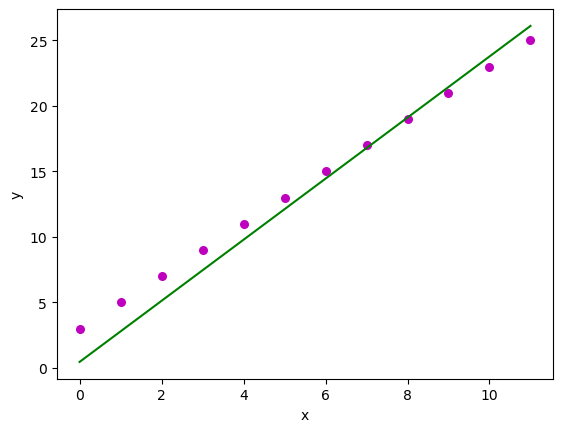

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regression_line(x, y, b):
    x = np.array(x)
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
    
    # predicted response vector
    y_pred = b[0] + b[1]*x
    
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

plot_regression_line(X, Y, [b0,b1])

### LinearRegressor Model

In [12]:
class LinearRegressor:
    def __init__(self, x, y, alpha=0.01, b0=0, b1=0):
        """ 
            x: input feature
            y: target values
            alpha: learning rate, default is 0.01
            b0, b1: initial regression coefficients (intercept and slope).
        """
        self.x = x
        self.y = y
        self.alpha = alpha
        self.b0 = b0
        self.b1 = b1
        self.i = 0  # Epoch counter
        if len(x) != len(y):
            raise ValueError("x and y should have the same number of elements.")
    
    def cost_function(self):
        """Calculates Mean Squared Error (MSE) cost function."""
        predictions = [self.predict(xi) for xi in self.x]
        errors = [(yi - pred) ** 2 for yi, pred in zip(self.y, predictions)]
        mse = sum(errors) / len(self.x)
        return mse
    
    def predict(self, x):
        """Predicts the value using the current coefficients."""
        return self.b0 + self.b1 * x

    def cost_derivative(self, i):
        """Computes the partial derivative of the cost function w.r.t b0 (i=0) or b1 (i=1)."""
        if i == 0:
            # Derivative of MSE with respect to b0
            return -2 * sum([yi - self.predict(xi) for xi, yi in zip(self.x, self.y)]) / len(self.x)
        elif i == 1:
            # Derivative of MSE with respect to b1
            return -2 * sum([(yi - self.predict(xi)) * xi for xi, yi in zip(self.x, self.y)]) / len(self.x)

    def update_coefficients(self):
        """Updates the coefficients b0 and b1 using gradient descent."""
        # Update b0 (intercept)
        self.b0 -= self.alpha * self.cost_derivative(0)
        # Update b1 (slope)
        self.b1 -= self.alpha * self.cost_derivative(1)

    def stop_iteration(self, max_epochs=1000):
        """Returns True if training should stop (based on max epochs)."""
        return self.i >= max_epochs

    def fit(self, max_epochs=1000):
        """Fits the model using gradient descent."""
        while not self.stop_iteration(max_epochs):
            self.update_coefficients()  # Update coefficients using gradient descent
            self.i += 1  # Increment epoch counter
#             print(f"Epoch {self.i}: coefficients: b0 = {model.b0}, b1 = {model.b1}") 


Final coefficients: b0 = 0.4608867655681514, b1 = 2.3315378184894033


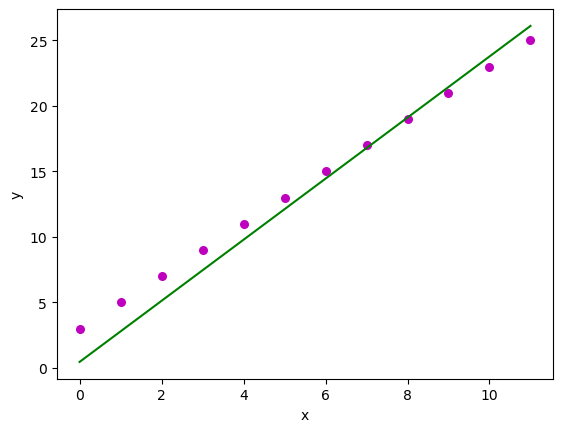

In [14]:
# Example usage
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

model = LinearRegressor(x, y, alpha=0.01)
model.fit(max_epochs=10)
print(f"Final coefficients: b0 = {model.b0}, b1 = {model.b1}")
plot_regression_line(x, y, [model.b0,model.b1])

Final coefficients: b0 = 2.990577464268503, b1 = 2.0012303220952337
mse: 0.0025091251985039625


23.002880685220838

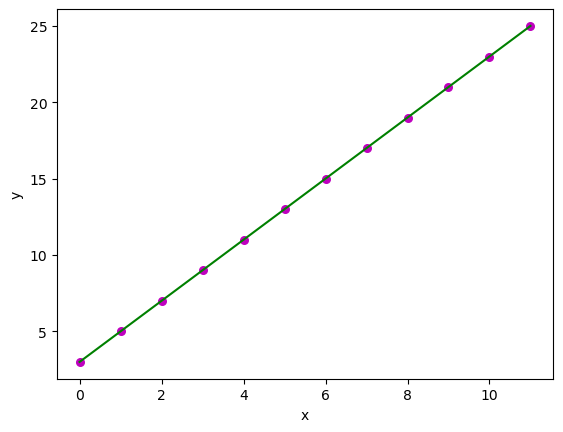

In [15]:

model = LinearRegressor(x, y, alpha=0.01)
model.fit(max_epochs=1000)
print(f"Final coefficients: b0 = {model.b0}, b1 = {model.b1}")

print(f"mse: {model.cost_function()*100}")

plot_regression_line(x, y, [model.b0,model.b1])

model.predict(10)


### from sklearn.linear_model import LinearRegression()

In [ ]:
from sklearn import linear_model
import numpy as np

reg = linear_model.LinearRegression()

X = [[i,0] for i in x]
# y = 2 * x_0 + 0 * x_1 + 3
Y = y

reg.fit(X,Y)
b1 , b2 = reg.coef_
b0 = reg.intercept_
print(b1, b2)
print(b0)

In [ ]:
from sklearn import linear_model
import numpy as np

reg = linear_model.LinearRegression()

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
Y = np.dot(X, np.array([1, 2])) + 3

reg.fit(X,Y)
print(reg.coef_)
print(reg.intercept_)

## Least Square Estimation

β0 = y' - x' β1 
                                                              …… equation 1

β1​ = ∑ xi .yi -  x' ∑yi / (∑xi^2​ - n x'^2)
                  …… equation 2

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressor:
    def __init__(self):
        self.b0 = 0  # Intercept (b0)
        self.b1 = 0  # Slope (b1)
    
    def fit(self, X, Y):
        """
        Fit the model to the data using Least Squares Estimation.
        X: list or numpy array of input features (x values)
        Y: list or numpy array of target values (y values)
        """
        # Convert X and Y to numpy arrays for easier manipulation
        X = np.array(X)
        Y = np.array(Y)
        
        # Compute the means of X and Y
        x_mean = np.mean(X)
        y_mean = np.mean(Y)
        
        # Compute the slope (b1)
        numerator = np.sum((X - x_mean) * (Y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.b1 = numerator / denominator
        
        # Compute the intercept (b0)
        self.b0 = y_mean - self.b1 * x_mean
    
    def predict(self, X):
        """
        Make predictions using the learned model.
        X: list or numpy array of input features (x values)
        Returns: Predicted y values
        """
        X = np.array(X)
        return self.b0 + self.b1 * X
    
    def plot(self, X, Y):
        """
        Plot the data points and the regression line.
        """
        # Make predictions
        Y_pred = self.predict(X)
        
        # Scatter plot of the actual data points
        plt.scatter(X, Y, color="m", marker="o", label="Actual data")
        
        # Plot the regression line
        plt.plot(X, Y_pred, color="g", label="Regression Line")
        
        # Add labels and title
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Linear Regression (Least Squares)')
        plt.legend()
        plt.show()
    
    def coefficient(self):
        """Returns the model's coefficients (b0 and b1)."""
        return self.b0, self.b1

    def mean_squared_error(self, X, Y):
        """
        Compute Mean Squared Error (MSE) to evaluate the model's performance.
        """
        Y_pred = self.predict(X)
        mse = np.mean((Y - Y_pred) ** 2)
        return mse


Intercept (b0): 3.0
Slope (b1): 2.0
Mean Squared Error: 0.0


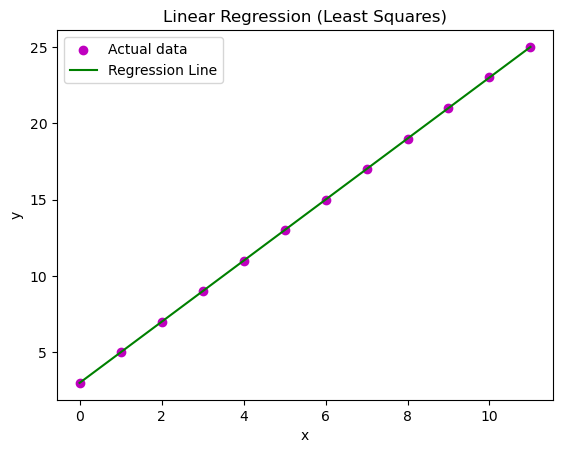

Prediction for x=6: 15.0


In [19]:
# Example usage
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

model = LinearRegressor()
model.fit(x,y)

 # Get the model's coefficients
b0, b1 = model.coefficient()
print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")

# Calculate Mean Squared Error
mse = model.mean_squared_error(X, Y)
print(f"Mean Squared Error: {mse*100}")

# Plot the regression line
model.plot(X, Y)

# Make a prediction for a new value
prediction = model.predict([6])
print(f"Prediction for x=6: {prediction[0]}")


## Types of Regression Techniques in ML
https://www.geeksforgeeks.org/types-of-regression-techniques/